In [101]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_excel('ENB2012_data.xlsx')

D = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1']]

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_features = minmax_scale.fit_transform(D)
scaled_df = pd.DataFrame(scaled_features, columns=D.columns)

scaled_df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838
...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,0.320032
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,0.283904
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,0.281208
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,0.282286


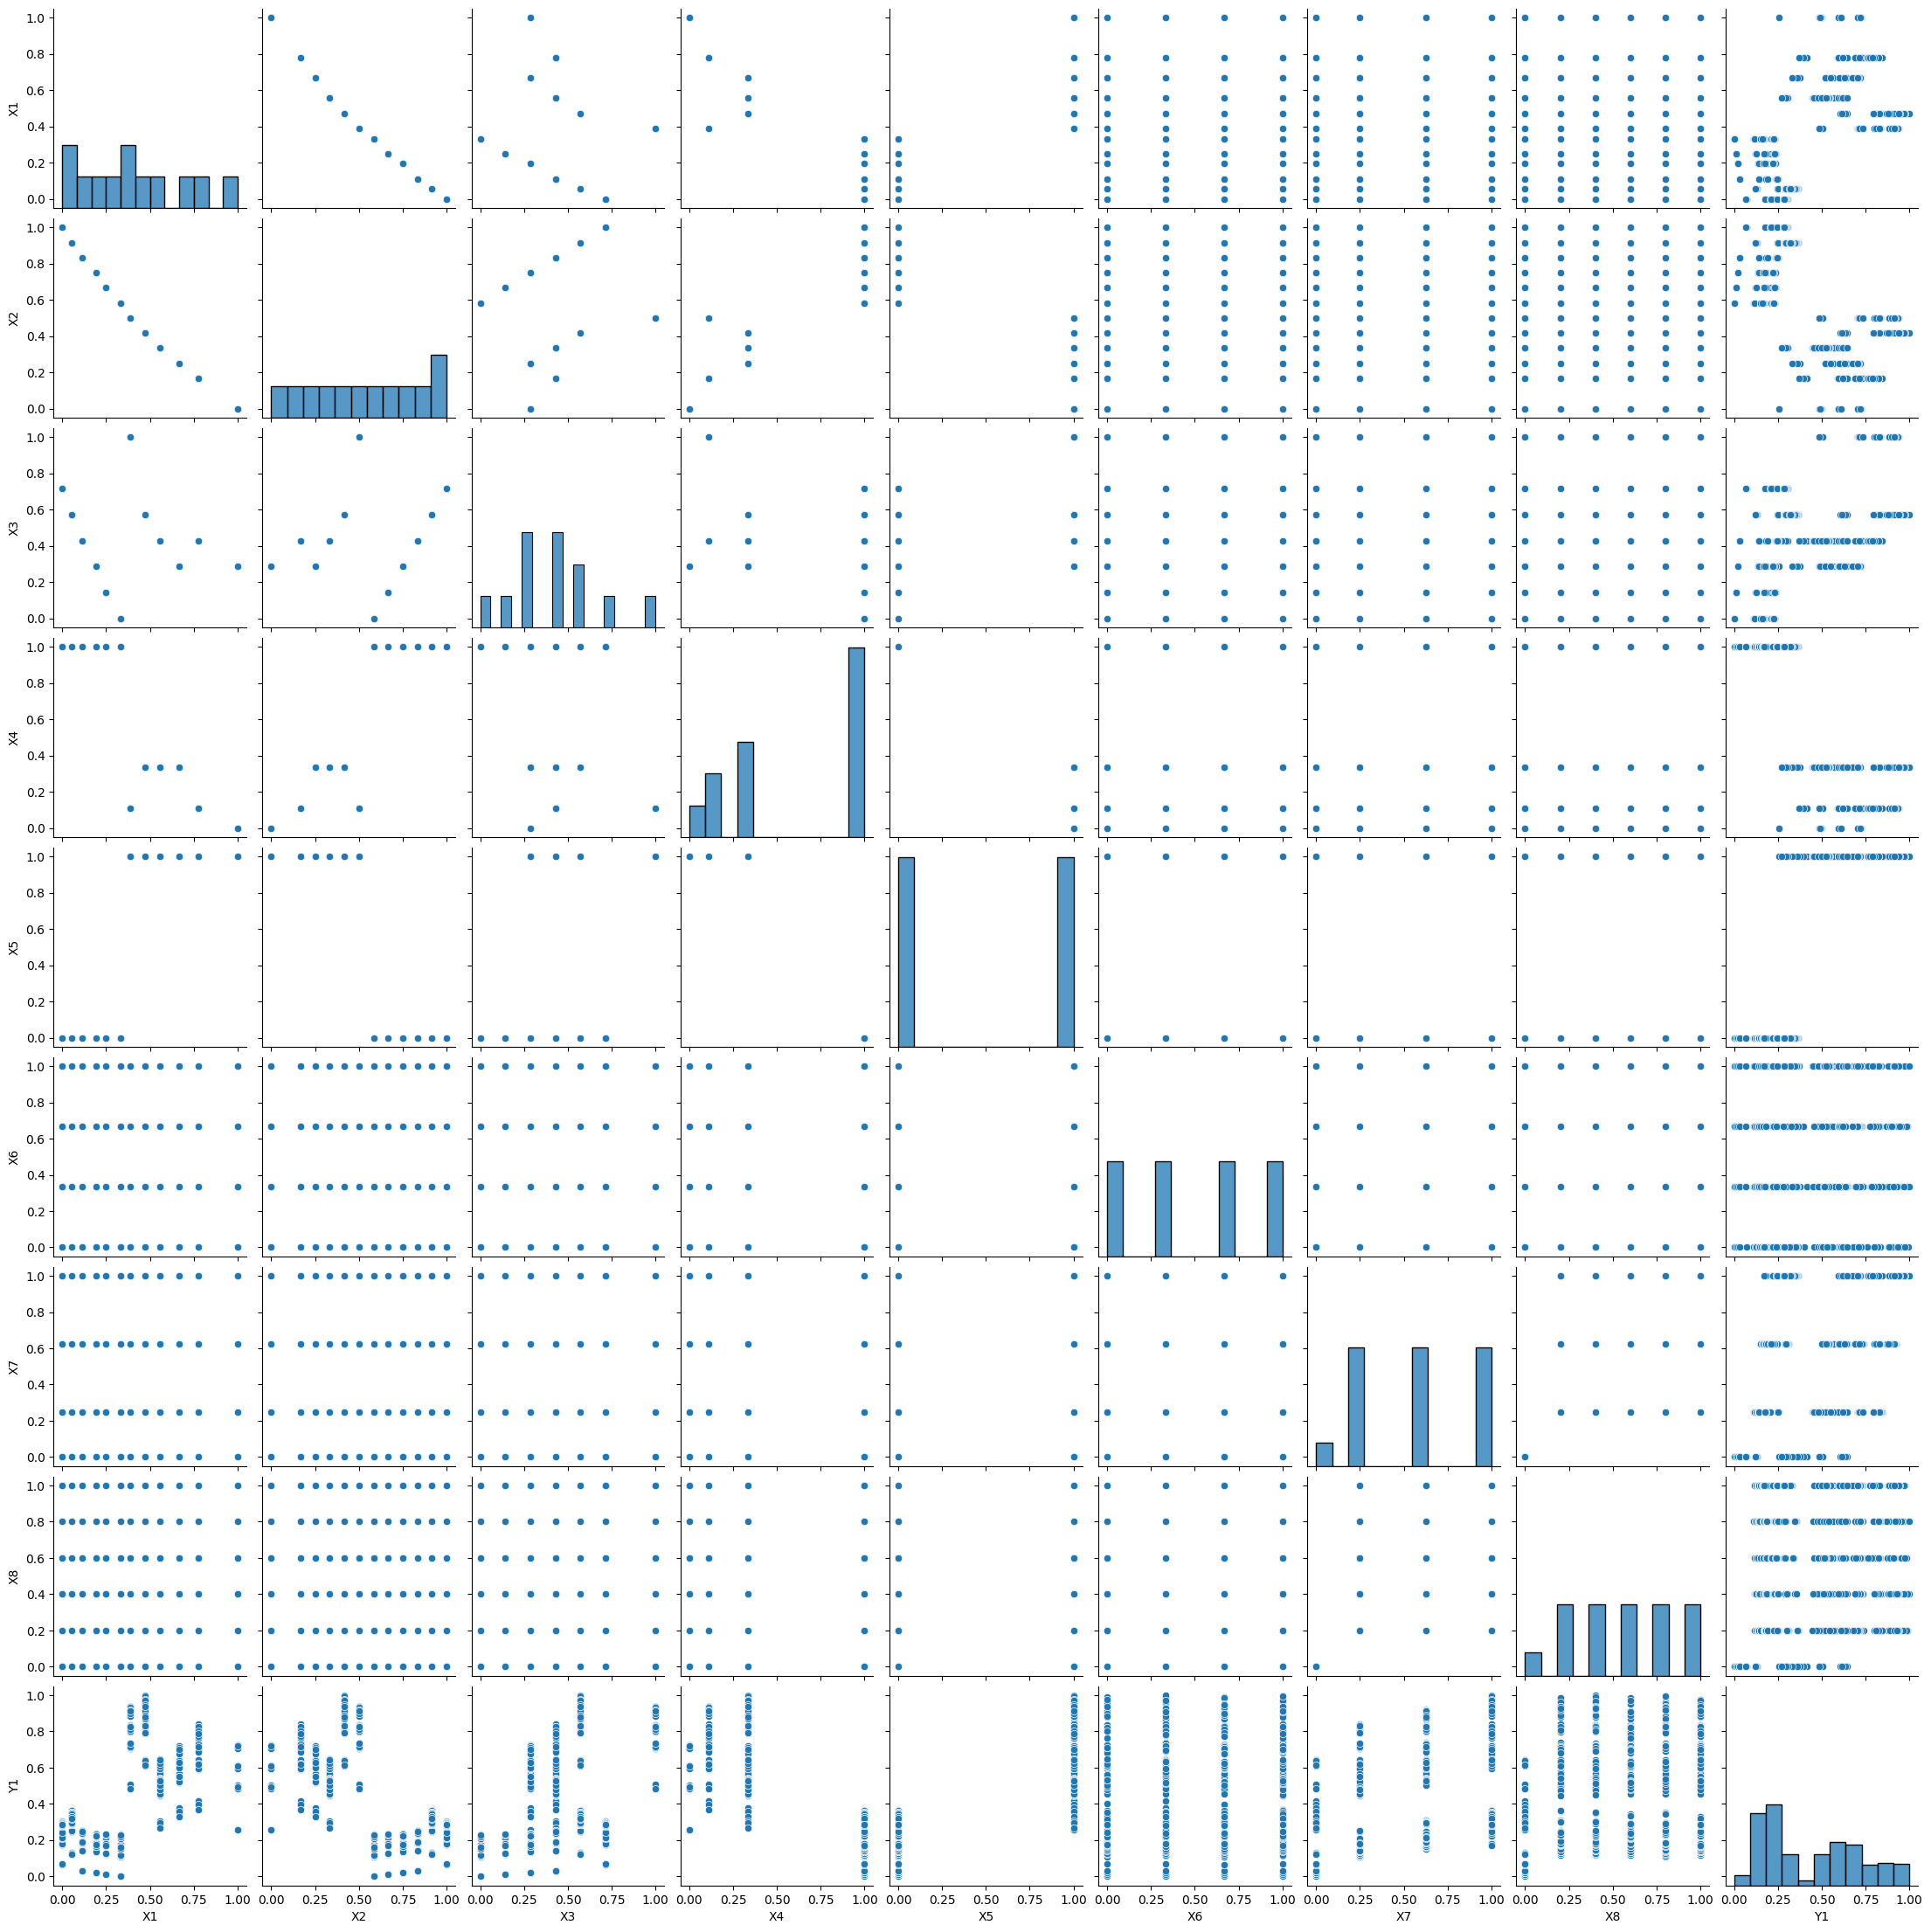

In [102]:
sns.pairplot(scaled_df)


<Axes: >

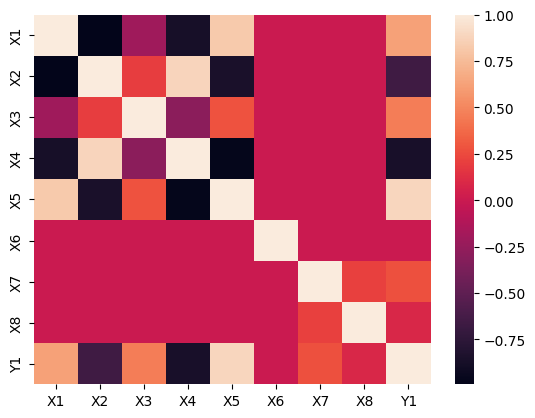

In [103]:
sns.heatmap(scaled_df.corr())

#To simplify the formula for ( w ) in the training phase, we understand that the determinant of the matrix ( x ) should not be zero. 

#For the determinant of a matrix to be non-zero, there must be no correlation between any of the features.

#But according to the chart below, there is correlation between our features, so we need to use the gradient descent method.

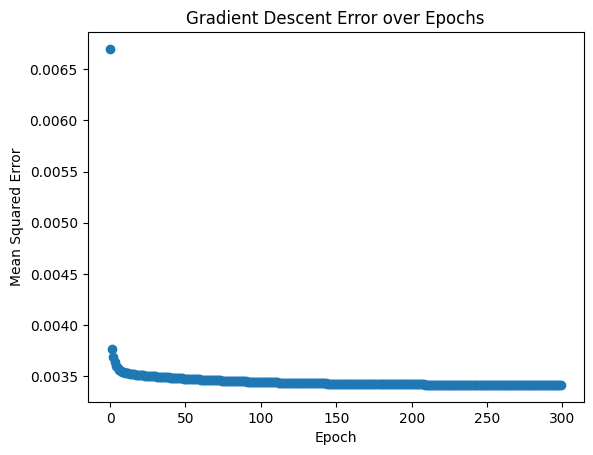

In [104]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X = scaled_df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']].values
Y = scaled_df[['Y1']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42, shuffle=True)

epoc = 300
n_row = X_train.shape[0]  
n_col = X_train.shape[1]

W = np.zeros(n_col)
b = 0
lr = 0.05

array_of_errors = np.zeros(epoc)

for e in range(epoc):
    sum_errors = 0
    for i in range(n_row):
        y_model = np.dot(X_train[i], W) + b
        error = y_model - Y_train[i, 0]
        W = W - lr * error * X_train[i]
        b = b - lr * error
        sum_errors += error ** 2
    mean_error = sum_errors / (2 * n_row)
    array_of_errors[e] = mean_error

plt.scatter(range(epoc), array_of_errors)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Descent Error over Epochs")
plt.show()


In [105]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, Y_train)

print("Weights sklearn: ", model.coef_)
print("Bais sklearn: ", model.intercept_)
print("Weights my code", W)
print("Bias my code: ", b)

Weights sklearn:  [[-0.61994796 -0.23843263  0.02463756 -0.33707271  0.3893036  -0.00190722
   0.21490067  0.03110445]]
Bais sklearn:  [0.66836374]
Weights my code [-0.59445952 -0.28922654  0.06302444 -0.2912348   0.35874617  0.00910062
  0.21254745  0.03592146]
Bias my code:  0.6453881668001074


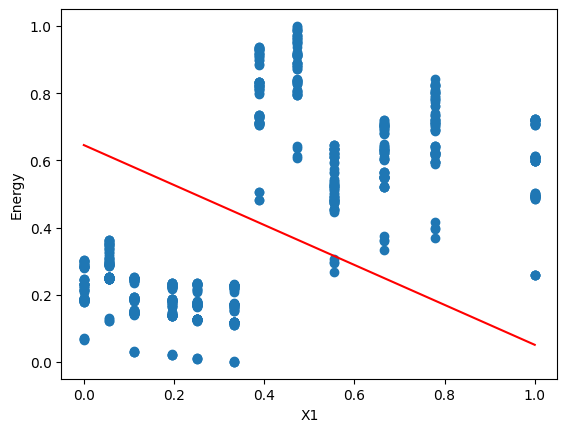

In [106]:
W_final = W
b_final = b

X1 = scaled_df[['X1']].values
y_pred = (W_final[0] * X1 + b_final)

plt.scatter(scaled_df['X1'], Y)
plt.plot(scaled_df['X1'], y_pred, color='red')
plt.xlabel('X1')
plt.ylabel('Energy')
plt.show()


In [107]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = np.dot(X_train, W) + b

y_pred_sklearn = model.predict(X_train)

mse = mean_squared_error(Y_train, y_pred)

r2 = r2_score(Y_train, y_pred)

mse_sklearn = mean_squared_error(Y_train, y_pred_sklearn)

r2_sklearn = r2_score(Y_train, y_pred_sklearn)

print("My model -> MSE:", mse)
print("Sklearn model -> MSE:", mse_sklearn)

print("My model -> R2:", r2)
print("Sklearn model -> R2:", r2_sklearn)


My model -> MSE: 0.006276762878997003
Sklearn model -> MSE: 0.006103276978195668
My model -> R2: 0.9149973164911761
Sklearn model -> R2: 0.9173467388611694


In [108]:
#Test

n_test = X_test.shape[0]

y_pred = np.zeros(n_test)

for i in range(n_test):
    
    y_pred[i] = np.dot(W_final, X_test[i]) + b_final

#calculate MSE
final_error = (y_pred - Y_test.flatten()) ** 2
mse_test = np.mean(final_error)

#calculate R2
sum_square_error = np.sum((Y_test.flatten() - y_pred) ** 2)
total_square = np.sum((Y_test.flatten() - np.mean(Y_test)) ** 2)
r2_test = 1 - (sum_square_error / total_square)

print("Test -> MSE:", mse_test)
print("Test -> R2:", r2_test)

Test -> MSE: 0.006721726939101851
Test -> R2: 0.9088056904940319


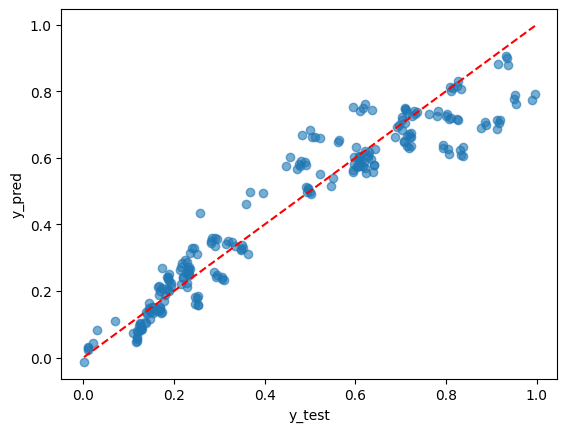

In [111]:
#Model output visualization

plt.scatter(Y_test, y_pred, alpha=0.6)

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')

plt.xlabel("y_test")
plt.ylabel("y_pred")

plt.show()


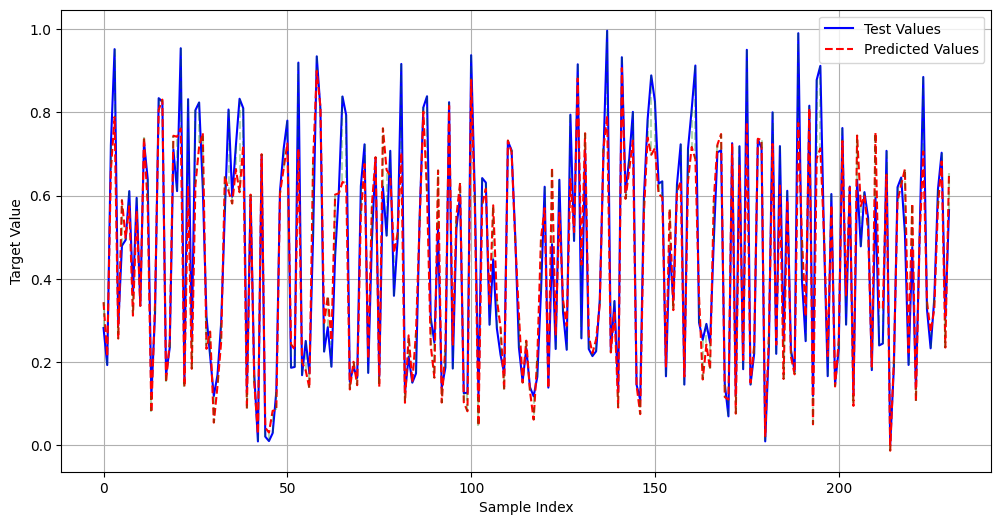

In [117]:
plt.figure(figsize=(12, 6))

plt.plot(Y_test, 'b-', label='Test Values')

plt.plot(y_pred, 'r--', label='Predicted Values')

for i in range(len(Y_test)):
    plt.plot([i, i], [Y_test.flatten()[i], y_pred[i]], 'g--', alpha=0.3)

plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()